# Исследование клиентов банка по потреблению

**Описание исследования**

Заказчик - продукт-менеджер регионального банка «Метанпром».

**Цель исследования** - разработать стратегию взаимодействия с клиентами для увеличения количества потребляемых продуктов. 

**Гипотезы:**
1) Средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается

2) Среднее количество баллов кредитного скоринга у клиентов, которые пользуются одним продуктом, и клиентов, которые пользуются двумя продуктами, различается 

**Описание данных**

Входные данные - csv-файл, который содержит данные о клиентах банка «Метанпром».

Таблица bank_dataset содержит следующие поля:
- userid — идентификатор пользователя
- score — баллы кредитного скоринга
- City — город
- Gender — пол
- Age — возраст
- Objects — количество объектов в собственности
- Balance — баланс на счёте
- Products — количество продуктов, которыми пользуется клиент
- CreditCard — есть ли кредитная карта
- Loyalty — активный клиент
- estimated_salary — заработная плата клиента
- Churn — факт оттока


**Ход исследования**
 
Перед тем, как разработать стратегию взаимодействия с клиентами, необходимо провести обзор данных, их предобработку, исследовательский анализ, сегментацию клиентов и проверку гипотез.
 
Таким образом, исследование пройдёт в 6 этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных (EDA).
 4. Сегментация клиентов.
 5. Проверка гипотез.
 6. Общий вывод.

## Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Откроем датасет
data = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
# Получим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
# Проверим датасет на наличие дубликатов
data.duplicated().sum()

0

**Вывод:**

- Всего в таблице: 11 столбцов и 10000 строк
- В столбце Balance есть пропущенные значения, это означает, что не у всех клиентов банка есть дебетовый счет и пропуски лучше оставить как есть
- Дубликаты в таблице не найдены
- Типы данных соответствуют, столбец gender можно перекодировать в двоичную систему для дальнейшего подсчета корреляции
- Названия столбцов необходимо привести к одному виду

## Предобработка данных

In [5]:
# Приводим названия столбцов к одному виду
data.columns = data.columns.str.lower()
data = data.rename(columns = {'userid': 'user_id', 'creditcard' : 'credit_card'})

In [6]:
# Заменим значения в столбце gender на числовые, где 0 = мужской, 1 = женский
data['gender'] = data['gender'].replace({'Ж':1, 'М':0})

In [7]:
# Перекодируем значения столбца city в бинарные, изменим названия новых столбцов
data['city_1'] = data['city']
data = pd.get_dummies(data, columns=['city_1']) 
data = data.rename(columns={'city_1_Ростов Великий':'rostov_velikiy', 'city_1_Рыбинск':'rybinsk', 'city_1_Ярославль':'yaroslavl'})

In [8]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
 12  rostov_velikiy    10000 non-null  uint8  
 13  rybinsk           10000 non-null  uint8  
 14  yaroslavl         10000 non-null  uint8  
dtypes: float64(2), int64(9), object(1), uint8(3)
memory usage: 966.9+ KB


**Вывод:**
- Приведены к одному виду названия столбцов датасета
- Категории заменены на числовые значения в столбце gender и city

##  Исследовательский анализ данных

### Описательные статистики

In [9]:
# Посчитаем описательные статистики для всех числовых признаков методом describe
data.describe()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_velikiy,rybinsk,yaroslavl
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,0.454300,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023
min,1.560844e+07,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,0.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,0.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,1.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,1.585843e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


**Вывод:**
- По среднему и стандартному отклонению мы видим, что числовые данные (кол-во обьектов, балланс, зарплата) достаточно вариабельны
- Ключевой признак кол-во продуктов представлен от 1 (мин. значение) до 4 (макс. значение), однако по квартилям мы видим, что большинство (50%) клиентов пользуются одним продуктом, это стоит учитывать при сегментации
- Другие важные признаки: кредитный скоринг и зарплата представлены от 350 (мин. значение) до 850 (макс. значение) и от 11 (мин. значение) до 199992 (макс. значение) соответственно, их среднее незначительно отличается от медианы, что может нам говорить об однородности распределения

### Матрица корреляции

In [10]:
# Построим матрицу кооредяции для всех признаков
data.corr()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_velikiy,rybinsk,yaroslavl
user_id,1.000000,0.005308,0.002641,0.009497,-0.014883,-0.008690,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.004049
score,0.005308,1.000000,0.002857,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.008928
gender,0.002641,0.002857,1.000000,0.027544,-0.014733,-0.025742,0.021859,-0.005766,-0.022544,0.008112,0.106512,0.024628,-0.016889,-0.006772
age,0.009497,-0.003965,0.027544,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.039208
objects,-0.014883,0.000842,-0.014733,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,-0.002848
balance,-0.008690,-0.004744,-0.025742,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208,-0.002604,-0.000208,0.002759
products,0.016972,0.012238,0.021859,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,0.001230
credit_card,-0.014025,-0.005458,-0.005766,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.002467
loyalty,0.001665,0.025651,-0.022544,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.003317
estimated_salary,0.015271,-0.001384,0.008112,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.003332


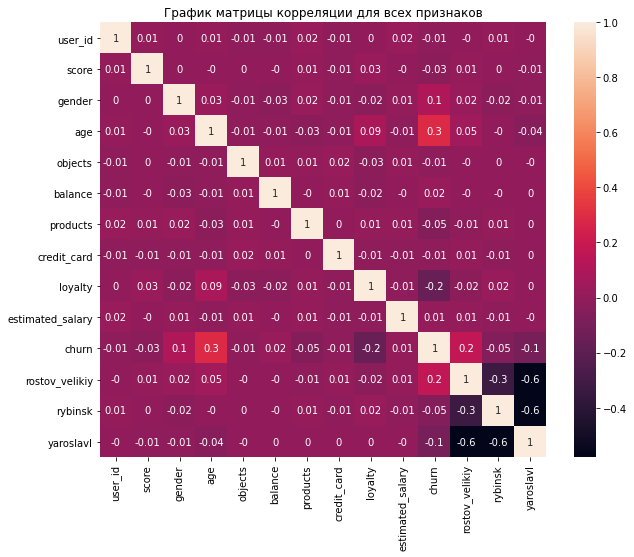

In [11]:
# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot = True, fmt='.1g')
plt.title('График матрицы корреляции для всех признаков')
plt.show()

**Вывод:**
- По матрице корреляции мы видим, что большинство признаков между собой практически не коррелируют, слабая зависимость обнаруживается между признаками пол, возраст, лояльность, фактом проживания в Ростове Великом и фактом оттока.
- По ключевым признакам (кол-во продуктов, зарплата, кредитный скоринг) какой-либо зависимости не обнаружено.

## Сегментация клиентов

Сегментацию клиентов можно произвести двумя способами, группировка на 4 сегмента по количеству продуктов и более однородная по количеству группировка по квартилям на 3 сегмента. Построим обе группировки с выводом среднего и сравним.

### Сегментация

In [12]:
# Напишем функцию для вывода основных данных: среднее всех признаков и количество клиентов
def get_segments(data, col):
    print(data.groupby(col)['user_id'].count())
    return data.groupby(col).agg('mean')

In [13]:
# Выведем агрегированные данные для первого варианта сегментации - по кол-ву потребляемых продуктов
get_segments(data, 'products')

products
1    5084
2    4590
3     266
4      60
Name: user_id, dtype: int64


,user_id,score,gender,age,objects,balance,credit_card,loyalty,estimated_salary,churn,rostov_velikiy,rybinsk,yaroslavl
products,,,,,,,,,,,,,
1,1.573237e+07,649.120968,0.451613,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144,0.265342,0.240165,0.494493
2,1.573484e+07,652.188671,0.448802,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817,0.226580,0.257734,0.515686
3,1.574182e+07,648.105263,0.560150,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068,0.360902,0.248120,0.390977
4,1.571936e+07,653.583333,0.633333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.000000,0.400000,0.116667,0.483333


In [14]:
# Создадим столбец с преобразованным номером группы и выведем агрегированные данные для второго варианта сегментации 
data['group'] = data['products'].map({1:1, 2:2, 3:3, 4:3})
get_segments(data, 'group')

group
1    5084
2    4590
3     326
Name: user_id, dtype: int64


,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_velikiy,rybinsk,yaroslavl
group,,,,,,,,,,,,,,
1,1.573237e+07,649.120968,0.451613,39.673092,4.974626,119894.163723,1.000000,0.703777,0.504131,99487.256851,0.277144,0.265342,0.240165,0.494493
2,1.573484e+07,652.188671,0.448802,37.753595,5.051852,119660.944362,2.000000,0.707190,0.532898,100452.012821,0.075817,0.226580,0.257734,0.515686
3,1.573768e+07,649.113497,0.573620,43.653374,5.058282,120074.314953,3.184049,0.708589,0.435583,104400.141503,0.858896,0.368098,0.223926,0.407975


In [15]:
# Сравним показатели корреляции для двух вариантов сегментации
data.corr()[['products', 'group']]

,products,group
user_id,0.016972,0.019728
score,0.012238,0.012352
gender,0.021859,0.018820
age,-0.030680,-0.038710
objects,0.013444,0.012878
balance,-0.001027,-0.002138
products,1.000000,0.991517
credit_card,0.003183,0.003821
loyalty,0.009612,0.010647
estimated_salary,0.014204,0.013860


**Вывод:**
- Обе сегментации показали заметную дифференциацию по кредитному скорингу, полу, возрасту, балансу, лояльности и оттоку. Это хорошее качество сегментации.
- Однако, в первой сегментации 3 и 4 группы достаточно малочисленны, что может исказить результаты. Также эти группы встречаются редко, основные пороги представлены одним и двумя продуктами, на них стоит обратить особое внимание.
- Корреляция не показала сильных различий
- Таким образом, будем использовать второй варинт сегментацим - по частоте встречаемости потребления разного кол-ва продуктов.

### Анализ сегментов

In [16]:
# Повторно отобразим среднее по каждому признаку для трех сегментов
data.groupby('group').agg('mean')

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,rostov_velikiy,rybinsk,yaroslavl
group,,,,,,,,,,,,,,
1,1.573237e+07,649.120968,0.451613,39.673092,4.974626,119894.163723,1.000000,0.703777,0.504131,99487.256851,0.277144,0.265342,0.240165,0.494493
2,1.573484e+07,652.188671,0.448802,37.753595,5.051852,119660.944362,2.000000,0.707190,0.532898,100452.012821,0.075817,0.226580,0.257734,0.515686
3,1.573768e+07,649.113497,0.573620,43.653374,5.058282,120074.314953,3.184049,0.708589,0.435583,104400.141503,0.858896,0.368098,0.223926,0.407975


In [17]:
# Напишем функцию для визуализации бинарных и категориальных признаков
signs = ['gender', 'credit_card', 'loyalty', 'churn', 'city']

def get_pie(signs, n, title):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(title)
    for i, col in enumerate(signs):
        plt.subplot(2, 3, i + 1)
        data.query('group == @n').groupby(col)[col].count().plot.pie(subplots=True, figsize=(11, 6), colors=sns.color_palette('spring_r'), autopct='%.0f%%', textprops=dict(color='olive'))
        plt.ylabel(None)
        plt.title(f'Признак {col}')

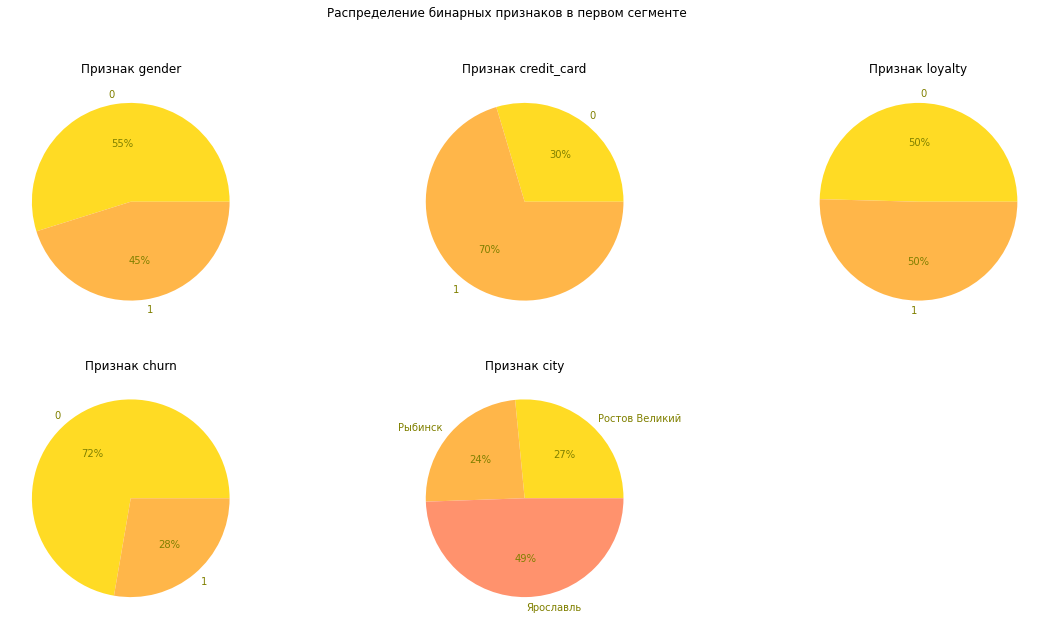

In [18]:
# Построим график распределения для первого сегмента
get_pie(signs, 1, 'Распределение бинарных признаков в первом сегменте')

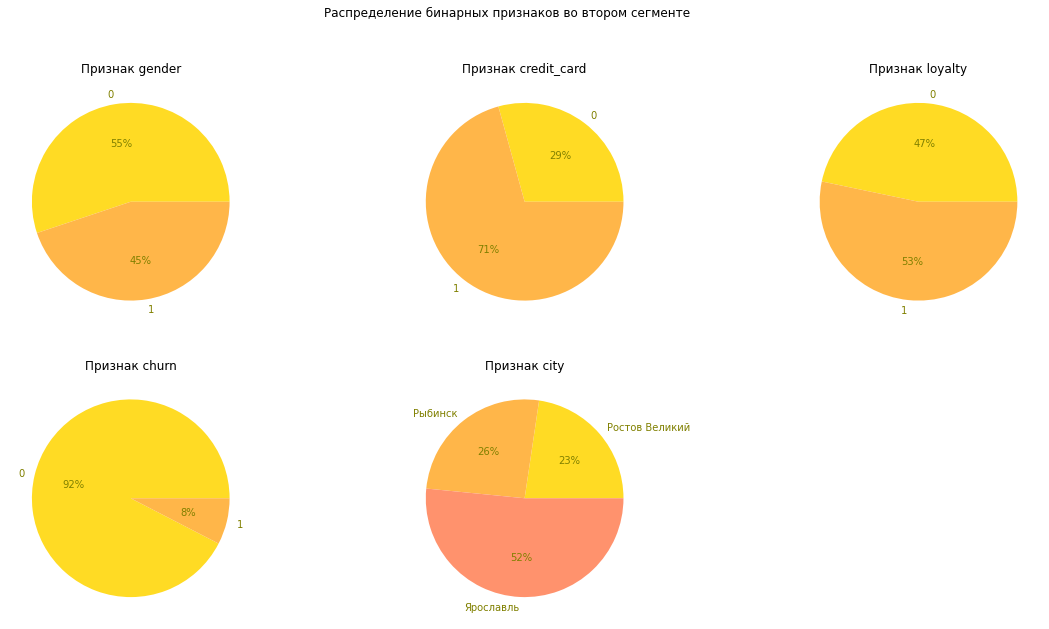

In [19]:
# Построим график распределения для второго сегмента
get_pie(signs, 2, 'Распределение бинарных признаков во втором сегменте')

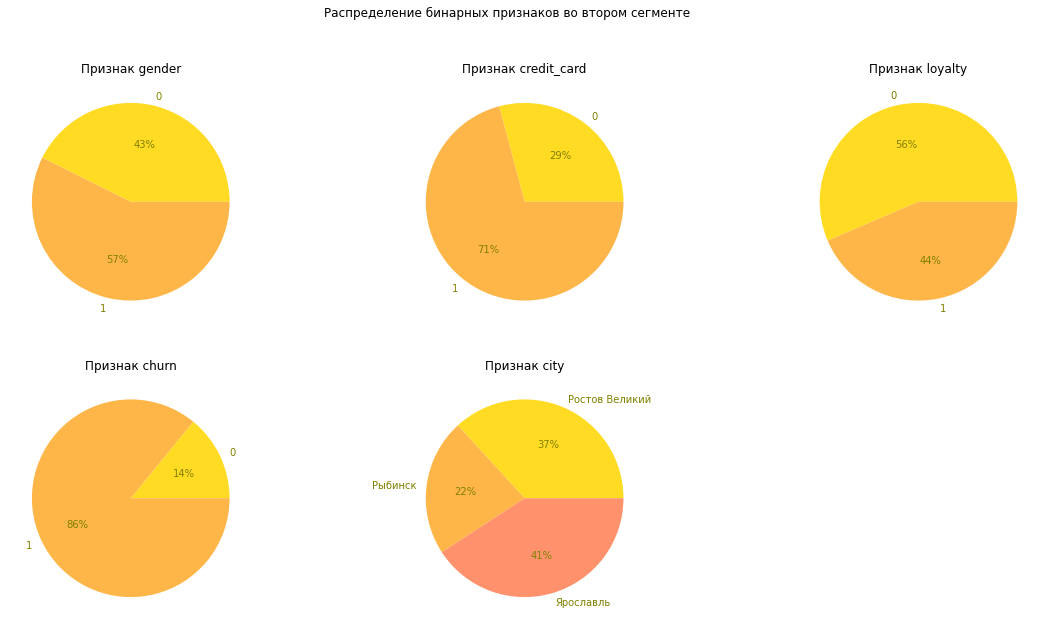

In [20]:
# Построим график распределения для третьего сегмента
get_pie(signs, 3, 'Распределение бинарных признаков во втором сегменте')

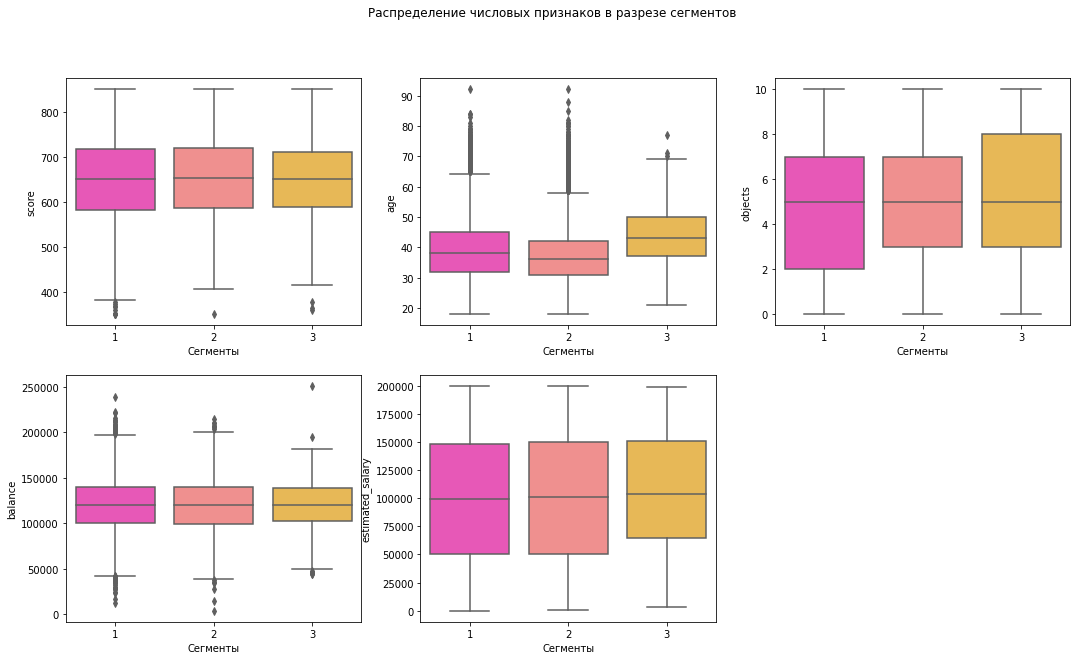

In [21]:
# Построим графики распределения числовых признаков
num_signs = ['score', 'age', 'objects', 'balance', 'estimated_salary']

fig1 = plt.figure(figsize=(18, 10))
fig1.suptitle('Распределение числовых признаков в разрезе сегментов')

for i, col in enumerate(num_signs):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data = data, y =col, x='group', palette='spring').set(xlabel = 'Сегменты')

In [22]:
# Посчитаем долю клиентов 1 сегмента без дебетового счета
data.query('group == 1')['balance'].isna().sum()/len(data.query('group == 1'))

0.17800944138473643

In [23]:
# Посчитаем долю клиентов 2 сегмента без дебетового счета
data.query('group == 2')['balance'].isna().sum()/len(data.query('group == 2'))

0.5664488017429193

In [24]:
# Посчитаем долю клиентов 3 сегмента без дебетового счета
data.query('group == 3')['balance'].isna().sum()/len(data.query('group == 3'))

0.34355828220858897

**Вывод**

Судя по распределению бинарных признаков и среднему:
- **1 сегмент**: больше клиентов мужского пола, больше пользователей кредитной карты, схожее количество активных и неактивных клиентов (доля активных клиентов - 0,50), больше тех, кто не ушел в отток (доля оттока - 0,27). Больше всего клиентов в городе Ярославль. Средний доход по сегменту ~ 99 тысяч. Средний баланс по сегменту ~ 119 тысяч.
- **2 сегмент**: больше клиентов мужского пола, больше пользователей кредитной карты, больше активных клиентов (доля активных клиентов - 0,53), значительно больше тех, кто не ушел в отток (доля оттока - 0,07). Больше всего клиентов в городе Ярославль. Средний доход по сегменту ~ 100 тысяч. Средний баланс по сегменту ~ 119 тысяч.
- **3 сегмент**: больше клиентов женского пола, больше пользователей кредитной карты, больше неактивных клиентов (доля активных клиентов - 0,43), больше тех, кто ушел в отток (доля оттока - 0,85). Больше всего клиентов в городе Ярославль, однако клиентов из города Ростов Великий больше, чем в других сегментов, это может влиять на отток. У клиентов третьего сегмента баланс и доход выше (104 тысячи и 120 тысяч соответственно), чем у клиентов остальных сегментов, однако это разница в 1%. 

Таким образом, наиболее стабильным и привлекательным является второй сегмент, в нем больше доля активных клиентов и меньше доля оттока. Третий сегмент можно отнести в категорию риска, так как, несмотря на то, что клиенты пользуются тремя и четырьмя продуктами, доля оттока очень высокая, клиенты чаще становятся неактивными. Следовательно, обратить внимание необходимо на клиентов, которые пользуются одним продуктом, и перевести их во второй сегмент, предложить еще один продукт.

## Проверка гипотез

### Гипотеза №1

Гипотеза №1 - Средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается

In [25]:
# Для проверки гипотез создадим таблицы с данными клиентов первого и второго сегмента
data_1 = data.query('products == 1')
data_2 = data.query('products == 2')

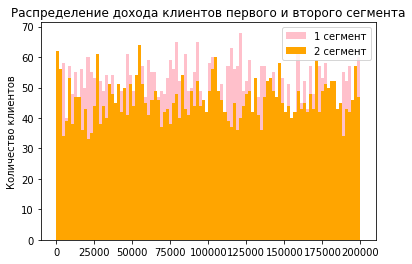

In [26]:
# Визуально оценим нормальность распределения
plt.hist(data_1['estimated_salary'], bins=100, color = 'pink', label = '1 сегмент')
plt.hist(data_2['estimated_salary'], bins=100, color = 'orange', label = '2 сегмент')
plt.title('Распределение дохода клиентов первого и второго сегмента')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Распределение далеко от нормального, для проверки гипотезы используем непараметрический критерий Манна-Уитни 

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - консервативная гипотеза: 
- H0 = средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не различается. 
- Н1 = средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается. 

In [27]:
# Поссчитаем p-значение и выведем результаты проверки
stat, p = st.mannwhitneyu(data_1['estimated_salary'], data_2['estimated_salary'], alternative='two-sided')
alpha = 0.05
print(p)
if p > alpha:
    print('Не можем отклонить нулевую гипотезу')
else:
    print('Отлоняем нулевую гипотезу')

0.4079566651927651
Не можем отклонить нулевую гипотезу


**Вывод:**

- p-значение = 0.40, это значительно больше alpha
- Мы не можем утверждать о том, что средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается.
- Доход не является признаком, дифференцирующим сегменты. 

### Гипотеза №2

Гипотеза №2 - среднее количество баллов кредитного скоринга у клиентов, которые пользуются одним продуктом, и клиентов, которые пользуются двумя продуктами, различается

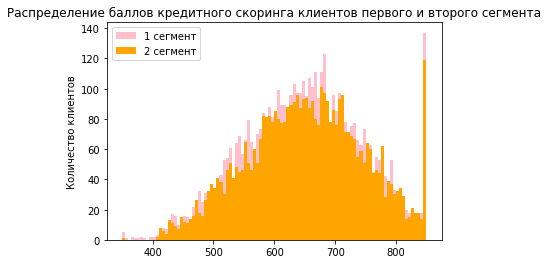

In [28]:
# Визуально оценим нормальность распределения
plt.hist(data_1['score'], bins=100, color = 'pink', label = '1 сегмент')
plt.hist(data_2['score'], bins=100, color = 'orange', label = '2 сегмент')
plt.title('Распределение баллов кредитного скоринга клиентов первого и второго сегмента')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

Визуально распределения напоминают нормальное, однако проверим это с помощью стат. критерия Шапиро-Уилка

In [29]:
# Тест на нормальность критерием Шапиро-Уилка
stat, p = st.shapiro(data_1['score']) 
alpha = 0.05
print('p-значение для первого распределения =', p)
if p > alpha:
    print('Принимаем гипотезу о нормальности первого распределения')
else:
    print('Отклоняем гипотезу о нормальности первого распределения')

stat, p = st.shapiro(data_2['score']) 
alpha = 0.05
print('p-значение для второго распределения =', p)
if p > alpha:
    print('Принимаем гипотезу о нормальности второго распределения')
else:
    print('Отклоняем гипотезу о нормальности второго распределения')

p-значение для первого распределения = 1.152575485139501e-13
Отклоняем гипотезу о нормальности первого распределения
p-значение для второго распределения = 3.4678284413980007e-14
Отклоняем гипотезу о нормальности второго распределения


Тест показал, что распределение не нормально, для проверки гипотезы используем непараметрический критерий Манна-Уитни 

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - консервативная гипотеза: 
- H0 = среднее количество баллов кредитного скоринга у клиентов, которые пользуются одним продуктом, и клиентов, которые пользуются двумя продуктами, не различается. 
- Н1 = среднее количество баллов кредитного скоринга у клиентов, которые пользуются одним продуктом, и клиентов, которые пользуются двумя продуктами, различается. 

In [30]:
# Поссчитаем p-значение и выведем результаты проверки
stat, p = st.mannwhitneyu(data_1['score'], data_2['score'], alternative='two-sided')
alpha = 0.05
print(p)
if p > alpha:
    print('Не можем отклонить нулевую гипотезу')
else:
    print('Отлоняем нулевую гипотезу')

0.15729739033138807
Не можем отклонить нулевую гипотезу


**Вывод:**

- p-значение = 0.15, это больше alpha
- Мы не можем утверждать о том, среднее количество баллов кредитного скоринга у клиентов, которые пользуются одним продуктом, и клиентов, которые пользуются двумя продуктами, различается.
- Баллы кредитного скоринга не являются признаком, дифференцирующим сегменты. Таким признаком мог бы быть возраст, среднее остальных признаков отличается незначительно.

## Общий вывод

Таким образом, исследование было выполнено в шесть этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных (EDA).
4. Сегментация клиентов.
5. Проверка гипотез.
6. Общий вывод.

**Исследовательский анализ данных: выводы**
- По среднему и стандартному отклонению мы видим, что числовые данные (кол-во обьектов, балланс, зарплата) достаточно вариабельны
- Признак кол-во продуктов представлен от 1 (мин. значение) до 4 (макс. значение), однако по квартилям мы видим, что большинство (50%) клиентов пользуются одним продуктом. Признаки кредитный скоринг и зарплата представлены от 350 (мин. значение) до 850 (макс. значение) и от 11 (мин. значение) до 199992 (макс. значение) соответственно, их среднее незначительно отличается от медианы, что может нам говорить об однородности распределения
- По ключевым признакам (кол-во продуктов, зарплата, кредитный скоринг) какой-либо зависимости не обнаружено.

**Сегментация клиентов: выводы**
- Для первого сегмента характерно больше клиентов мужского пола, больше пользователей кредитной карты, схожее количество активных и неактивных клиентов (доля активных клиентов - 0,50), больше тех, кто не ушел в отток (доля оттока - 0,27). 
- Для второго сегмента характерно больше клиентов мужского пола, больше пользователей кредитной карты, больше активных клиентов (доля активных клиентов - 0,53), значительно больше тех, кто не ушел в отток (доля оттока - 0,07).
- Для третьего сегмента характерно больше клиентов женского пола, больше пользователей кредитной карты, больше неактивных клиентов (доля активных клиентов - 0,43), больше тех, кто ушел в отток (доля оттока - 0,85).

**Проверка гипотез: выводы**
- Мы не можем подтвердить гипотезу о том, что средний доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различается
- Мы не можем подтвердить гипотезу о том, среднее количество баллов кредитного скоринга у клиентов, которые пользуются одним продуктом, и клиентов, которые пользуются двумя продуктами, различается
- Следовательно, эти признаки не являются дифференцирующими

**Общий вывод:**
- Наиболее привлекательным с точки зрения активности клиентов и минимального оттока является второй сегмент (клиенты, которые пользуются двумя продуктами), при этом средний доход и кредитный скоринг клиентов с двумя продуктами и одним не различается. Клиентская аудитория обоих сегментов схожа. Соответственно первый сегмент можно отнести к потенциальным потребителм двух продуктов. 
- Как рекомендация, следует обратить внимание на клиентов первого сегмента, это наиболее подходящая для предложения нового продукта категория клиентов. Среди них - 30% клиентов не имеют кредитной карты и 17% не имеют дебетового счета. Эти продукты можно им предложить.
- Также следует обратить внимание на третий сегмент, клиенты этого сегмента отличаются от остальных по кол-ву объектов, доходу и возрасту, следовательно они могут быть более платежеспособными, однако они также более склоны к оттоку, их необходимо удержать. Возможно одним из факторов оттока является обслуживание в городе Ростов Великий, стоит провести проверку ростовских филиалов.

## Презентация

Ссылка на презентацию в формате pdf - https://disk.yandex.ru/i/axpwycG8r7E0Ww

Ссылка на дашборд - https://public.tableau.com/views/dashboardbanks/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link